In [1]:
library(readr)
library(tidyverse)
library("qiime2R")
library("phyloseq")
library("microbiome")

-- Attaching packages ----------------------------------------------------------------------------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.3     v dplyr   1.0.6
v tibble  3.1.1     v stringr 1.4.0
v tidyr   1.1.3     v forcats 0.5.1
v purrr   0.3.4     

-- Conflicts -------------------------------------------------------------------------------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


microbiome R package (microbiome.github.com)
    


 Copyright (C) 2011-2020 Leo Lahti, 
    Sudarshan Shetty et al. <microbiome.github.io>



Attaching package: 'microbiome'


The following object is masked from 'package:ggplot2':

    alpha


The following object is masked from 'package:base':

    transform




In [2]:
setwd('/Users/alchemist/Aakash/BonnGut/Microbiome_pipeline')
workdir = getwd()

In [3]:
#
pseq<-qza_to_phyloseq(
    features=paste(workdir,"/feature_table/table.qza",sep=""),
    tree=paste(workdir,"/phylo_tree/rooted_tree.qza",sep=""),
         paste(workdir,"/taxonomy/tax_ezbiocloud.qza",sep=""),
    paste(workdir,"/metadata/metadata.tsv",sep="")
    )
#
Group_var_1 = '' #for color
Group_var_2 = '' #for shape
#
pseq

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 981 taxa and 110 samples ]
sample_data() Sample Data:       [ 110 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 981 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 981 tips and 968 internal nodes ]

In [5]:
#
pseq = aggregate_taxa(pseq, "Genus")
pseq <- core(microbe, detection = 0.0001, prevalence = .5) #default filtering
#
ig <- make_network(pseq, max.dist=0.7)

Saving 7 x 7 in image



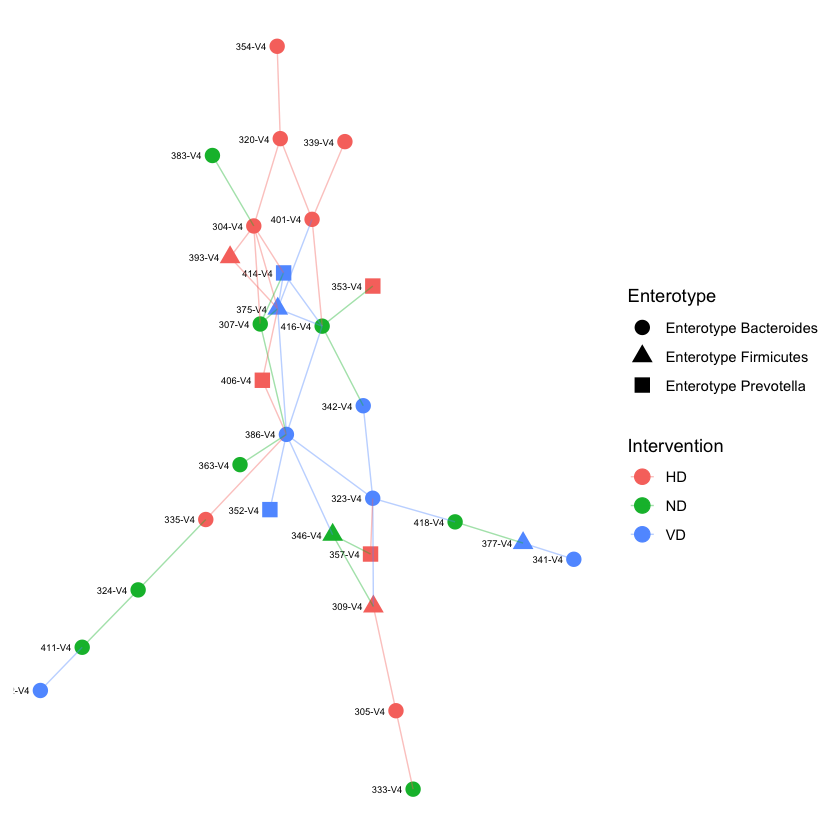

In [6]:
plot_network(ig, pseq, color=Group_var_1, shape=Group_var_2, line_weight=0.4)
ggsave(paste(workdir,paste("/network_analysis/network.png","_",Group_var_1,"_",Group_var_2,sep=""),sep=""))